In [2]:
import math
%load_ext autoreload
%autoreload 2

import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from astropy.timeseries import LombScargle
import pandas as pd
pd.set_option('precision', 0)
pd.set_option('display.float_format', lambda x: '%.16f' % x)

In [3]:
# Make the notebook use the whole screen width
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# 1. Read the eclipsing binary series - sim_eb.lc

In [4]:
df = pd.read_csv("../../data/sim_eb.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
df.dtypes

Time    float64
Lc      float64
dtype: object

In [5]:
X, Y = df['Time'].tolist(), df['Lc'].tolist()
X, Y = np.array(X), np.array(Y)

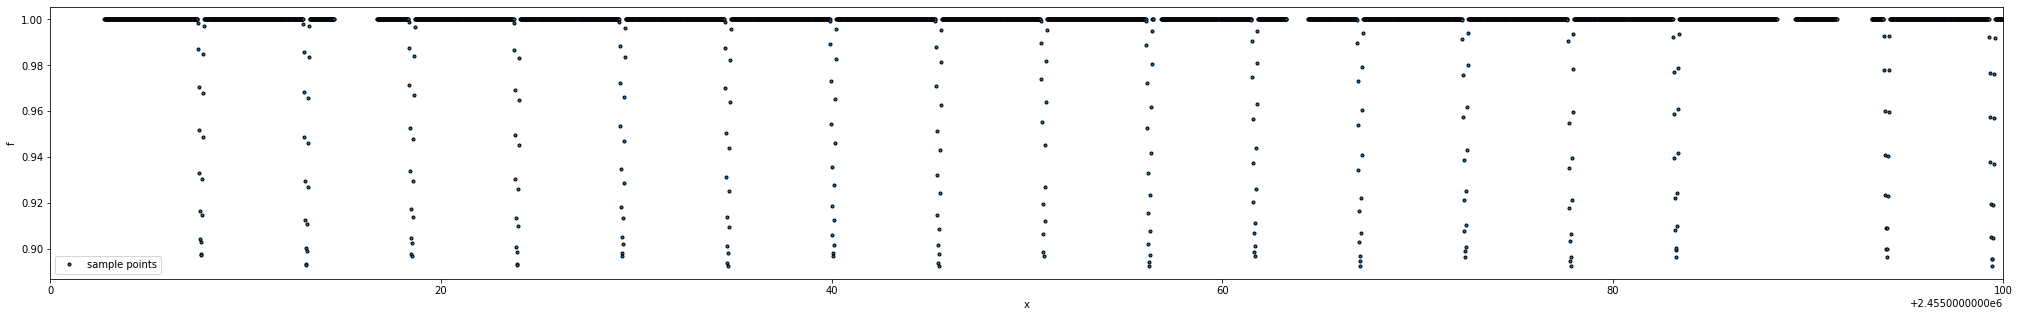

In [6]:
# Setup our figure environment
plt.figure(figsize=(35, 5))

# Plot observations
plt.plot(X, Y, ".", mew=1, linewidth=1, mec="black")
plt.xlim(2.4550e6, 2.4551e6)

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

In [9]:
frequency, power = LombScargle(X, Y).autopower(minimum_frequency=0.0, maximum_frequency=5)
frequency, power

(array([0.00000000e+00, 1.36011628e-04, 2.72023257e-04, ...,
        4.99978746e+00, 4.99992347e+00, 5.00005948e+00]),
 array([           inf, 1.02450126e-05, 1.03251269e-05, ...,
        1.26181187e-06, 1.34122449e-06, 9.75167114e-07]))

(Text(0.5, 0, 'frequency'), Text(0, 0.5, 'power'))

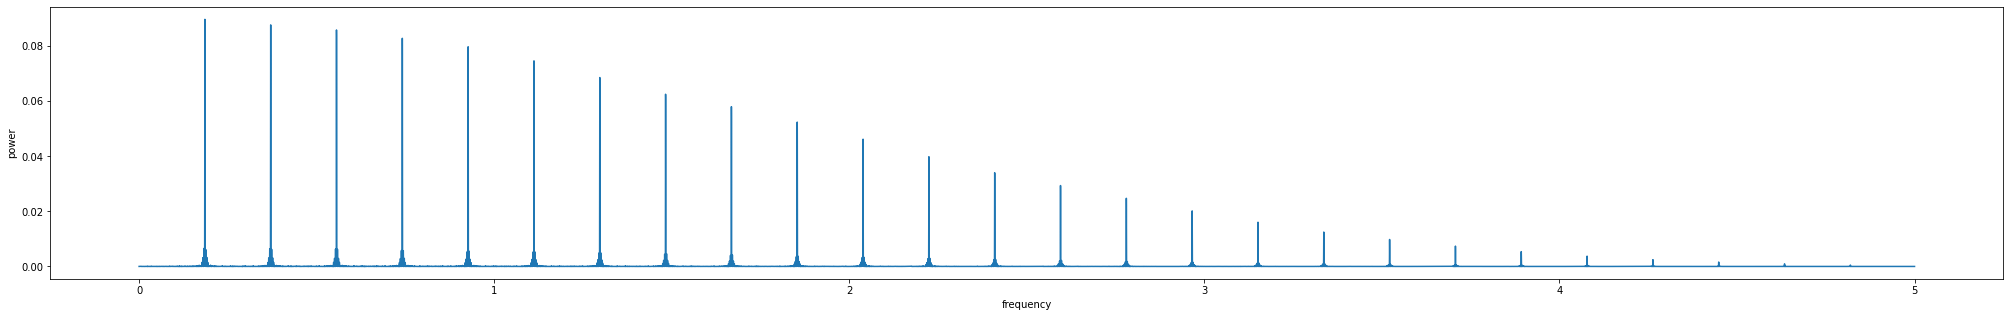

In [10]:
plt.figure(figsize=(35, 5))
plt.plot(frequency, power)
plt.xlabel("frequency"), plt.ylabel("power")

# 3. Read the third time series - sim_noisy_pulse_eb.lc

In [11]:
df = pd.read_csv("../../data/sim_noisy_pulse_eb.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
X, Y = df['Time'].tolist(), df['Lc'].tolist()
X, Y = np.array(X), np.array(Y)

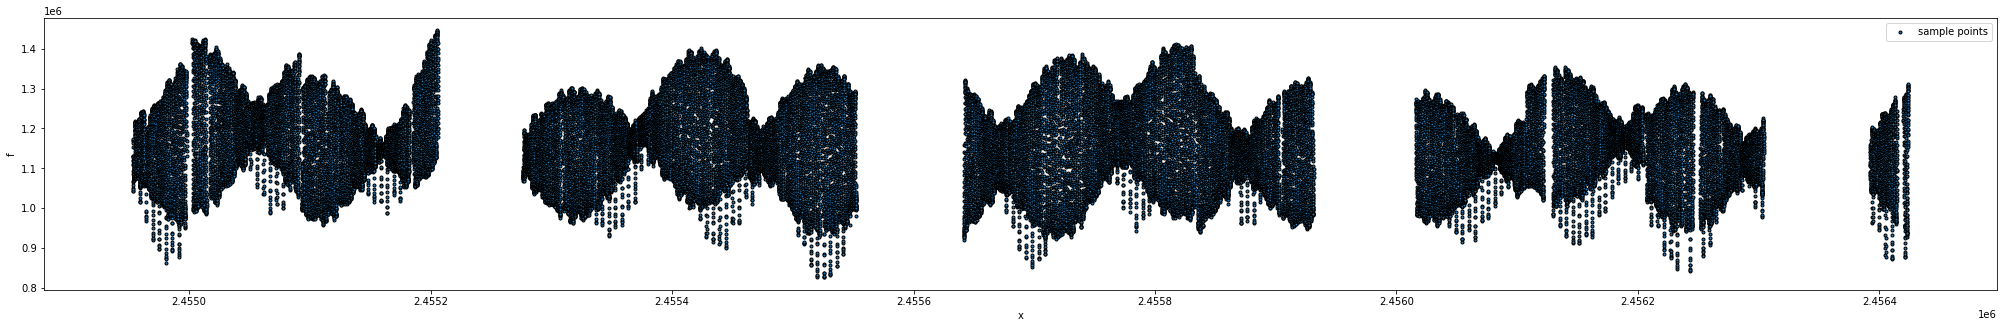

In [12]:
# Setup our figure environment
plt.figure(figsize=(35, 5))

# Plot observations
plt.plot(X, Y, ".", mew=1, linewidth=1, mec="black")

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

(Text(0.5, 0, 'frequency'), Text(0, 0.5, 'power'))

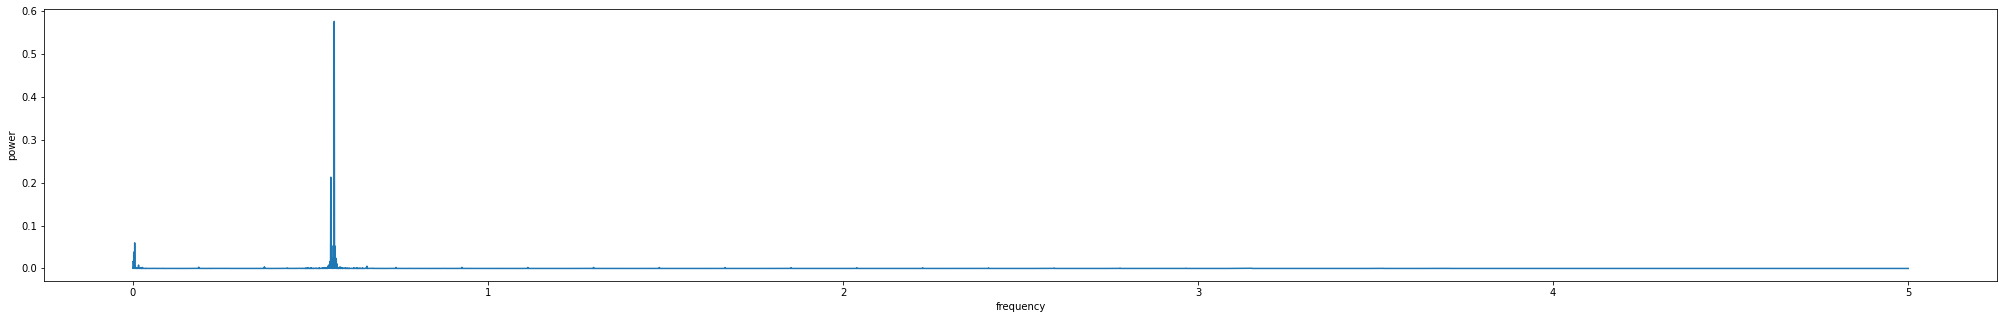

In [13]:
frequency, power = LombScargle(X, Y).autopower(minimum_frequency=0.0, maximum_frequency=5)
plt.figure(figsize=(35, 5))
plt.plot(frequency, power)
plt.xlabel("frequency"), plt.ylabel("power")